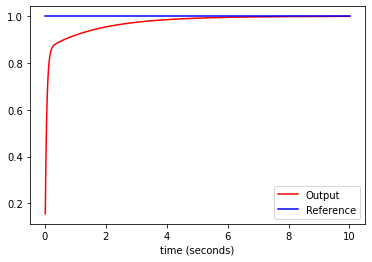

In [1]:
import sys
sys.path.append("../../")
import time

from lib.data.dataplot import *
from lib.utils.time import *
from lib.system.basic import *

class S:

    def __init__(self):
        self.y = 0

    def evaluate(self, delta_t, _input):
        self.y = self.y * (1 - 3 * delta_t) + 5 * _input * delta_t
        return self.y

class PIController:
    
    def __init__(self, _kp, _ki):
        self.P = Proportional(_kp)
        self.I = Integrator()
        self.ki = _ki
        
    def evaluate(self, delta_t, error):
        return self.P.evaluate(delta_t, error) + self.ki * self.I.evaluate(delta_t, error)


class S1:
    
    def __init__(self):
        self.contrl = PIController(3,2)
        self.s = S()
        self.y = 0
        
    def evaluate(self, delta_t, _input):
        error = _input - self.y
        out_controller = self.contrl.evaluate(delta_t, error)
        self.y = self.s.evaluate(delta_t, out_controller)
        return self.y


dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")
dp.add_y("ref", "Reference")

s = S1()
u = 1

# inner loop
t = Time()
t.start()
while t.get() < 10:

    time.sleep(0.01)
    delta_t = t.elapsed()
    
    y = s.evaluate(delta_t, u)
    
    dp.append_x(t.get())
    dp.append_y("out", y)
    dp.append_y("ref", u)

dp.plot()

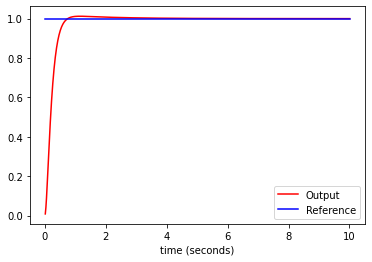

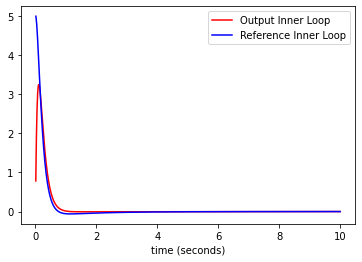

In [2]:

class CompleteSystem:
    
    def __init__(self):
        self.contrl = PIController(5, 0)
        self.s1 = S1()
        self.integr = Integrator()
        self.y = 0
        
    def evaluate(self, delta_t, _input):
        error = _input - self.y
        self.out_controller = self.contrl.evaluate(delta_t, error)
        self.out_s1 = self.s1.evaluate(delta_t, self.out_controller)
        self.y = self.integr.evaluate(delta_t, self.out_s1)
        return self.y
    
dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")
dp.add_y("ref", "Reference")

dp2 = DataPlotter()
dp2.set_x("time (seconds)")
dp2.add_y("out", "Output Inner Loop")
dp2.add_y("ref", "Reference Inner Loop")

s = CompleteSystem()
u = 1

# outer loop
t = Time()
t.start()
while t.get() < 10:

    time.sleep(0.01)
    delta_t = t.elapsed()
    
    y = s.evaluate(delta_t, u)
    
    dp.append_x(t.get())
    dp.append_y("out", y)
    dp.append_y("ref", u)

    dp2.append_x(t.get())
    dp2.append_y("out", s.out_s1)
    dp2.append_y("ref", s.out_controller)

dp.plot()
dp2.plot()
